(21, 21)


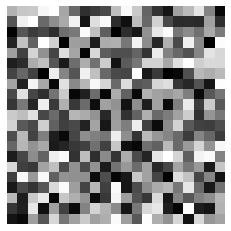

In [1]:
import numpy as np
import matplotlib.pyplot as plt

image_res = 21
radius = image_res // 2

ini_im = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],]
ini_im = np.random.uniform(size=(21,21))
ini_im = np.abs(np.array(ini_im)-1)
mask_pos = np.zeros((image_res, image_res))
for i in range(image_res):
    for j in range(image_res):
        if np.sqrt((i-radius)**2 + (j-radius)**2) > radius:
            mask_pos[i,j] = 1.
mask_neg = np.abs((mask_pos - 1))
            
#plt.imshow(ini_im*mask_neg+mask_pos, cmap='gray', vmin=0.0, vmax=1.0)
plt.imshow(ini_im, cmap='gray', vmin=0.0, vmax=1.0)
plt.axis(False);
print(ini_im.shape)

(-0.5, 20.5, 20.5, -0.5)

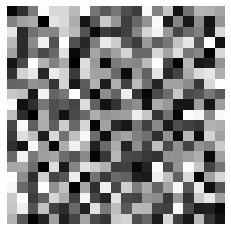

In [2]:
from imutils import rotate

new_im = rotate(ini_im.astype(np.double), 90)
plt.imshow(new_im, cmap='gray', vmin=0.0, vmax=1.0)
plt.axis(False)

In [3]:
from BesselConv2d import BesselConv2d

from tensorflow import keras

C:\Users\vdelchev\Documents\PythonVENVs\MainEnv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
model = keras.models.Sequential()

k = 11 ; n_filters = 1
model.add(BesselConv2d(k=k, C_out=n_filters, reflex_inv=False, scale_inv=False, 
                       strides=1, padding='VALID', activation=None, CNNWarmup=None,
                       input_shape=(21,21,1)))
model.build(input_shape=(None, 21, 21, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bessel_conv2d (BesselConv2d  (None, 11, 11, 1)        31265     
 )                                                               
                                                                 
Total params: 31,265
Trainable params: 289
Non-trainable params: 30,976
_________________________________________________________________


In [5]:
print(model.layers[0].weights)

[<tf.Variable 'bessel_conv2d/weights_real_part:0' shape=(16, 8, 1) dtype=float32, numpy=
array([[[ 0.09070907],
        [ 0.01883868],
        [ 0.09476955],
        [ 0.01966465],
        [-0.0702592 ],
        [ 0.02276518],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.12112536],
        [ 0.08784898],
        [-0.1269398 ],
        [-0.01939477],
        [ 0.1037098 ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.0035047 ],
        [-0.07405005],
        [ 0.03252682],
        [-0.11767151],
        [-0.12549992],
        [ 0.07038092],
        [ 0.        ],
        [ 0.        ]],

       [[-0.05466065],
        [-0.07986889],
        [-0.11214039],
        [ 0.14950582],
        [-0.19465129],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.12958927],
        [ 0.19204445],
        [ 0.22949232],
        [-0.01206693],
        [ 0.08857194],
        [ 0.        ],
        [ 0.        ],
      

In [6]:
out1 = model.predict(ini_im[None,:,:,None])

1/1 [==============================] - 0s 201ms/step


In [7]:
out2 = model.predict(new_im[None,:,:,None])

1/1 [==============================] - 0s 16ms/step


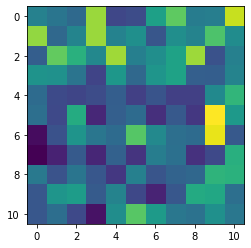

In [8]:
plt.imshow(out1[0,:,:,0])

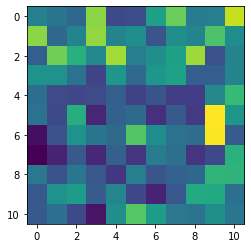

In [9]:
plt.imshow(rotate(out2[0,:,:,0], -90))